# Comparing Granulocyte Gene Expression with B-Cell Expression in the Bone Marrow dataset

## Importing/Installing needed libraries

In [2]:
%%bash
pip install scprep
pip install umap-learn

  Using cached scprep-1.2.3-py3-none-any.whl (94 kB)
  Using cached umap_learn-0.5.7-py3-none-any.whl (88 kB)
  Using cached numba-0.60.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.7 MB)
  Using cached pynndescent-0.5.13-py3-none-any.whl (56 kB)
  Using cached llvmlite-0.43.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43.9 MB)


In [3]:
import pandas as pd
import numpy as np
import scprep, umap 
import matplotlib.pyplot as plt
%matplotlib inline 

## Generating the csv files from the Marrow-count.csv file
Used pandas on local machine to filter out the b-cells and granulocytes, respectively. Here are copies of the code. This caused crashes on the datahub due to the transpose method. The function works by collecting the cells within the Marrow-counts.csv file that correspond to the plate_ids given in the metadata file.

In [3]:
"""
import pandas as pd

def main():
    print("Exploring the Marrow-counts data")
    marrow_df = pd.read_csv("Marrow-counts.csv")
    marrow_df_transpose = marrow_df.transpose()

    data_rows = marrow_df_transpose.iloc[1:]
    gene_names = marrow_df_transpose.iloc[:1]
    
    # Define B-cell barcodes
    plate_barcodes = ['D042044', 'D042479', 'MAA000652', 'MAA001883', 'MAA001884']
    
    # Create empty list to store filtered data for each barcode
    filtered_dfs = []
    
    # Go through each barcode and filter
    for barcode in plate_barcodes:
        # Filter rows where index contains this barcode
        barcode_data = data_rows[data_rows.index.str.contains(barcode)]
        filtered_dfs.append(barcode_data)
    
    # Combine all the filtered dataframes
    bcell_data = pd.concat(filtered_dfs)
    bcell_data.columns = gene_names.iloc[0]
    
    print("\nB-cell data:")
    print(bcell_data.head())
    print("\nShape of B-cell data:", bcell_data.shape)
    
    # Print number of cells from each barcode
    for barcode in plate_barcodes:
        count = len([idx for idx in bcell_data.index if barcode in idx])
        print(f"Cells from {barcode}: {count}")

    # Save the final dataframe to CSV with cells as rows and genes as columns
    bcell_data.to_csv('bcell-counts.csv')

if __name__ == '__main__':
    main()
"""

'\nimport pandas as pd\n\ndef main():\n    print("Exploring the Marrow-counts data")\n    marrow_df = pd.read_csv("Marrow-counts.csv")\n    marrow_df_transpose = marrow_df.transpose()\n\n    data_rows = marrow_df_transpose.iloc[1:]\n    gene_names = marrow_df_transpose.iloc[:1]\n    \n    # Define B-cell barcodes\n    plate_barcodes = [\'D042044\', \'D042479\', \'MAA000652\', \'MAA001883\', \'MAA001884\']\n    \n    # Create empty list to store filtered data for each barcode\n    filtered_dfs = []\n    \n    # Go through each barcode and filter\n    for barcode in plate_barcodes:\n        # Filter rows where index contains this barcode\n        barcode_data = data_rows[data_rows.index.str.contains(barcode)]\n        filtered_dfs.append(barcode_data)\n    \n    # Combine all the filtered dataframes\n    bcell_data = pd.concat(filtered_dfs)\n    bcell_data.columns = gene_names.iloc[0]\n    \n    print("\nB-cell data:")\n    print(bcell_data.head())\n    print("\nShape of B-cell data:", b

In [4]:
"""
import pandas as pd

def main():
    print("Exploring the Marrow-counts data")
    marrow_df = pd.read_csv("Marrow-counts.csv")
    marrow_df_transpose = marrow_df.transpose()
    
    data_rows = marrow_df_transpose.iloc[1:]
    gene_names = marrow_df_transpose.iloc[:1]
    
    # Define granulocyte barcodes
    plate_barcodes = ['D041912', 'MAA000409', 'MAA000639', 'D045139', 'D045140']
    
    # Create empty list to store filtered data for each barcode
    filtered_dfs = []
    
    # Go through each barcode and filter
    for barcode in plate_barcodes:
        # Filter rows where index contains this barcode
        barcode_data = data_rows[data_rows.index.str.contains(barcode)]
        filtered_dfs.append(barcode_data)
    
    # Combine all the filtered dataframes
    granulocyte_data = pd.concat(filtered_dfs)
    granulocyte_data.columns = gene_names.iloc[0]
    
    print("\nGranulocyte data:")
    print(granulocyte_data.head())
    print("\nShape of granulocyte data:", granulocyte_data.shape)
    
    # Print number of cells from each barcode
    for barcode in plate_barcodes:
        count = len([idx for idx in granulocyte_data.index if barcode in idx])
        print(f"Cells from {barcode}: {count}")

    # Save the final dataframe to CSV with cells as rows and genes as columns
    granulocyte_data.to_csv('granulocyte-counts.csv')

if __name__ == '__main__':
    main()
"""

'\nimport pandas as pd\n\ndef main():\n    print("Exploring the Marrow-counts data")\n    marrow_df = pd.read_csv("Marrow-counts.csv")\n    marrow_df_transpose = marrow_df.transpose()\n    \n    data_rows = marrow_df_transpose.iloc[1:]\n    gene_names = marrow_df_transpose.iloc[:1]\n    \n    # Define granulocyte barcodes\n    plate_barcodes = [\'D041912\', \'MAA000409\', \'MAA000639\', \'D045139\', \'D045140\']\n    \n    # Create empty list to store filtered data for each barcode\n    filtered_dfs = []\n    \n    # Go through each barcode and filter\n    for barcode in plate_barcodes:\n        # Filter rows where index contains this barcode\n        barcode_data = data_rows[data_rows.index.str.contains(barcode)]\n        filtered_dfs.append(barcode_data)\n    \n    # Combine all the filtered dataframes\n    granulocyte_data = pd.concat(filtered_dfs)\n    granulocyte_data.columns = gene_names.iloc[0]\n    \n    print("\nGranulocyte data:")\n    print(granulocyte_data.head())\n    prin

## Data Processing

### Reading Data

In [4]:
bcell_data = scprep.io.load_csv("marrow_subcounts/bcell-counts.csv", cell_axis='row', sparse=True)
display(bcell_data.head())
print(bcell_data.shape)

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
A22.D042044.3_9_M.1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C5.D042044.3_9_M.1.1,0.0,112.0,0.0,0.0,0.0,58.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,15.0,144.0,0.0,80.0,0.0
D10.D042044.3_9_M.1.1,0.0,185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,129.0,0.0
E13.D042044.3_9_M.1.1,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,57.0,45.0,0.0,0.0,0.0,0.0
F19.D042044.3_9_M.1.1,0.0,0.0,0.0,0.0,0.0,255.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,262.0,0.0,26.0,0.0,0.0,87.0,0.0


(1484, 23433)


In [5]:
granulocyte_data = scprep.io.load_csv("marrow_subcounts/granulocyte-counts.csv", cell_axis='row', sparse=True)
display(granulocyte_data.head())
print(granulocyte_data.shape)

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
B3.D041912.3_8_M.1.1,0.0,259.0,376.0,0.0,0.0,8.0,133.0,0.0,0.0,131.0,...,0.0,0.0,0.0,0.0,79.0,28.0,0.0,0.0,0.0,0.0
O1.D041912.3_8_M.1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P8.D041912.3_8_M.1.1,0.0,73.0,0.0,0.0,0.0,121.0,0.0,0.0,0.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167.0,0.0
A1.D041912.3_8_M.1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,0.0
B4.D041912.3_8_M.1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,92.0,79.0,0.0,0.0,0.0,0.0,0.0


(1373, 23433)


### Combining the data

In [6]:
data = [bcell_data, granulocyte_data]
batch_labels = ['*BCell-scRNA-Data', '*Granulocyte-scRNA-Data']
data, sample_labels = scprep.utils.combine_batches(data, batch_labels)

In [7]:
print(data.shape)
print(data.columns)
print(data.index)

(2857, 23433)
Index(['0610005C13Rik', '0610007C21Rik', '0610007L01Rik', '0610007N19Rik',
       '0610007P08Rik', '0610007P14Rik', '0610007P22Rik', '0610008F07Rik',
       '0610009B14Rik', '0610009B22Rik',
       ...
       'Zxdb', 'Zxdc', 'Zyg11a', 'Zyg11b', 'Zyx', 'Zzef1', 'Zzz3', 'a',
       'l7Rn6', 'zsGreen_transgene'],
      dtype='object', length=23433)
Index(['A22.D042044.3_9_M.1.1_*BCell-scRNA-Data',
       'C5.D042044.3_9_M.1.1_*BCell-scRNA-Data',
       'D10.D042044.3_9_M.1.1_*BCell-scRNA-Data',
       'E13.D042044.3_9_M.1.1_*BCell-scRNA-Data',
       'F19.D042044.3_9_M.1.1_*BCell-scRNA-Data',
       'H2.D042044.3_9_M.1.1_*BCell-scRNA-Data',
       'I9.D042044.3_9_M.1.1_*BCell-scRNA-Data',
       'J14.D042044.3_9_M.1.1_*BCell-scRNA-Data',
       'K17.D042044.3_9_M.1.1_*BCell-scRNA-Data',
       'L21.D042044.3_9_M.1.1_*BCell-scRNA-Data',
       ...
       'F5.D045140.3_38_F.1.1_*Granulocyte-scRNA-Data',
       'M20.D045140.3_38_F.1.1_*Granulocyte-scRNA-Data',
       'N22.D0451

lookup = pd.Series(data.index).apply(lambda x: x.split('.')[1])
metadata = pd.read_csv('metadata_FACS.csv', index_col=0).loc[lookup.values].reset_index()
metadata.index = data.index
display(metadata.head())
display(metadata.tail())

In [9]:
lookup = pd.Series(data.index).apply(lambda x: x.split('.')[1])
metadata = pd.read_csv('metadata_FACS.csv', index_col=0).loc[lookup.values].reset_index()
metadata.index = data.index
metadata.head()

,plate.barcode,mouse.id,tissue,subtissue,FACS.selection,mouse.sex
A22.D042044.3_9_M.1.1_*BCell-scRNA-Data,D042044,3_9_M,Marrow,B-cells,Multiple,M
C5.D042044.3_9_M.1.1_*BCell-scRNA-Data,D042044,3_9_M,Marrow,B-cells,Multiple,M
D10.D042044.3_9_M.1.1_*BCell-scRNA-Data,D042044,3_9_M,Marrow,B-cells,Multiple,M
E13.D042044.3_9_M.1.1_*BCell-scRNA-Data,D042044,3_9_M,Marrow,B-cells,Multiple,M
F19.D042044.3_9_M.1.1_*BCell-scRNA-Data,D042044,3_9_M,Marrow,B-cells,Multiple,M


In [46]:
lookup_annotations = pd.Series(data.index).apply(lambda x: x.split('_*')[0])
raw_annotations = pd.read_csv('annotations_facs.csv', index_col = 'cell')
valid_cells = [cell for cell in lookup_annotations.values if cell in raw_annotations.index]
valid_data_idx = [idx for idx, cell in zip(data.index, lookup_annotations) if cell in valid_cells]

#Not all cells in the annotations, only add the cells that are present, will not use in analysis
annotations = pd.read_csv('annotations_facs.csv', index_col='cell').loc[valid_cells].reset_index()
annotations.index = valid_data_idx
print(annotations.head())

                                                          cell Neurog3>0_raw  \
A22.D042044.3_9_M.1.1_*BCell-scRNA-Data  A22.D042044.3_9_M.1.1           NaN   
C5.D042044.3_9_M.1.1_*BCell-scRNA-Data    C5.D042044.3_9_M.1.1           NaN   
D10.D042044.3_9_M.1.1_*BCell-scRNA-Data  D10.D042044.3_9_M.1.1           NaN   
E13.D042044.3_9_M.1.1_*BCell-scRNA-Data  E13.D042044.3_9_M.1.1           NaN   
I9.D042044.3_9_M.1.1_*BCell-scRNA-Data    I9.D042044.3_9_M.1.1           NaN   

                                        Neurog3>0_scaled cell_ontology_class  \
A22.D042044.3_9_M.1.1_*BCell-scRNA-Data              NaN     immature B cell   
C5.D042044.3_9_M.1.1_*BCell-scRNA-Data               NaN     late pro-B cell   
D10.D042044.3_9_M.1.1_*BCell-scRNA-Data              NaN    precursor B cell   
E13.D042044.3_9_M.1.1_*BCell-scRNA-Data              NaN          macrophage   
I9.D042044.3_9_M.1.1_*BCell-scRNA-Data               NaN          macrophage   

                                      

/tmp/ipykernel_421/1591153012.py:2: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_annotations = pd.read_csv('annotations_facs.csv', index_col = 'cell')
/tmp/ipykernel_421/1591153012.py:7: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  annotations = pd.read_csv('annotations_facs.csv', index_col='cell').loc[valid_cells].reset_index()


### Filtering the Data

### Plotting library size with scprep and filtering using graphical data.
I chose cutoffs of 6 and 90 after looking at the graphs.

<Axes: title={'center': 'Library size before filtering'}, xlabel='Library size', ylabel='Number of cells'>

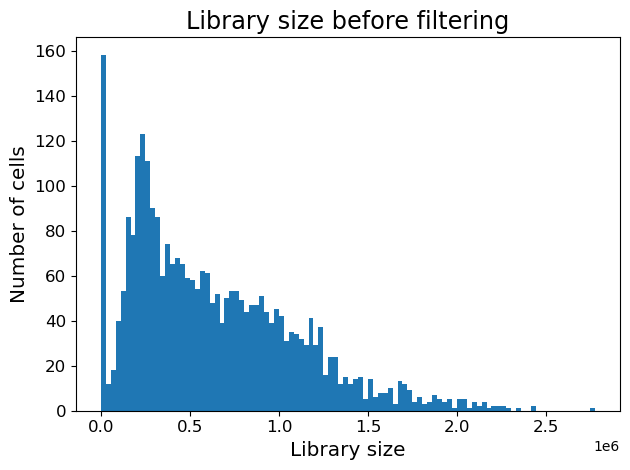

In [12]:
scprep.plot.plot_library_size(data, log=False, title='Library size before filtering')

<Axes: title={'center': 'Library size before filtering'}, xlabel='Library size', ylabel='Number of cells'>

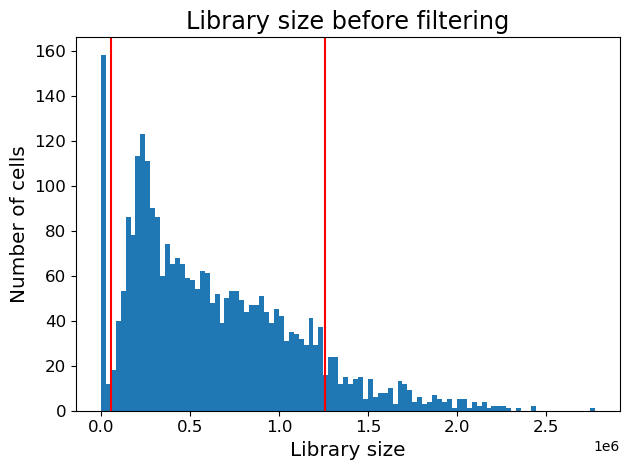

In [13]:
percentiles = (6 , 90)
scprep.plot.plot_library_size(data, log=False, title='Library size before filtering', percentile=percentiles)

<Axes: title={'center': 'Library size after filtering'}, xlabel='Library size', ylabel='Number of cells'>

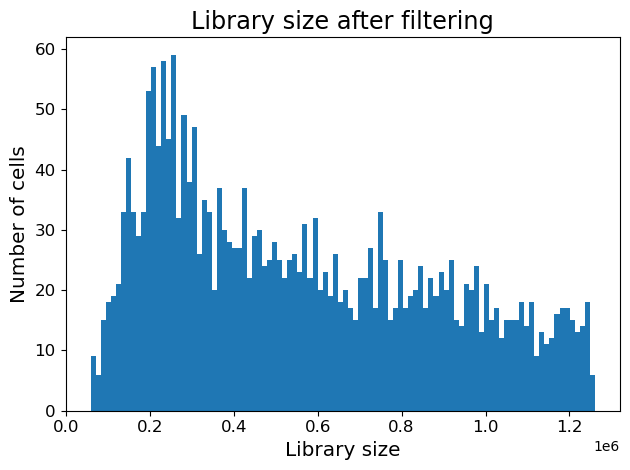

In [14]:
data, metadata = scprep.filter.filter_library_size(data, metadata, percentile=percentiles)
scprep.plot.plot_library_size(data, log=False, title='Library size after filtering')

### Filtering out genes with low capture
I chose to filter out genes with less than 10 capture count

<Axes: title={'center': 'Gene capture before filtering'}, xlabel='# of cells with nonzero expression', ylabel='# of genes'>

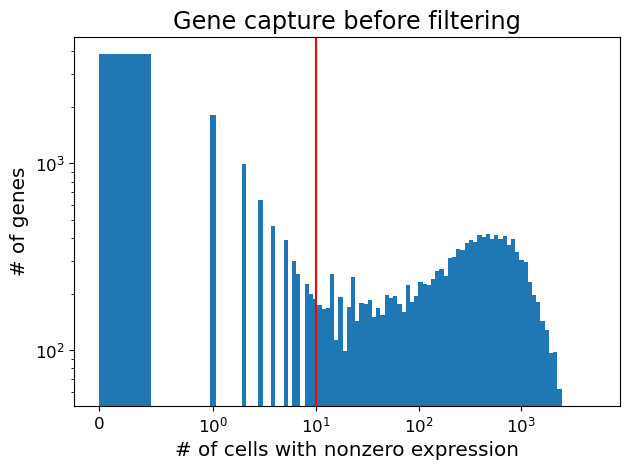

In [15]:
scprep.plot.histogram(scprep.measure.gene_capture_count(data), 
                      cutoff = 10,
                      log=True,
                      title="Gene capture before filtering",
                      xlabel='# of cells with nonzero expression',
                      ylabel='# of genes')

In [16]:
data = scprep.filter.filter_rare_genes(data, min_cells=10)

<Axes: title={'center': 'Gene capture after filtering'}, xlabel='# of cells with nonzero expression', ylabel='# of genes'>

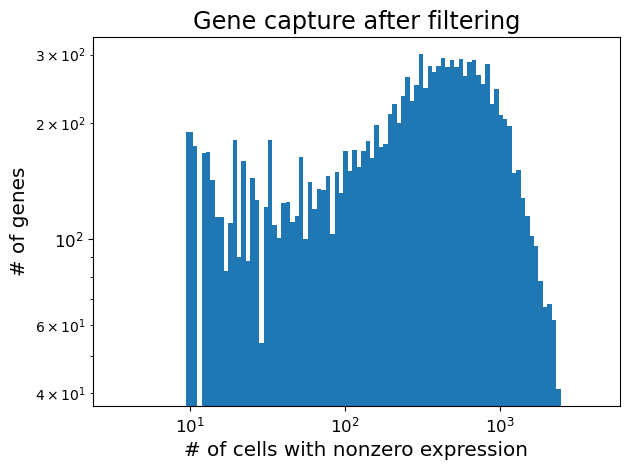

In [17]:
scprep.plot.histogram(scprep.measure.gene_capture_count(data), log=True,
                      title="Gene capture after filtering",
                     xlabel='# of cells with nonzero expression',
                     ylabel='# of genes')

Checking the shape of the matrix after the filtering process

In [18]:
print(data.shape)

(2399, 14313)


### Normalization for library size

<Axes: title={'center': 'Library size before normalization'}, xlabel='Library size', ylabel='Number of cells'>

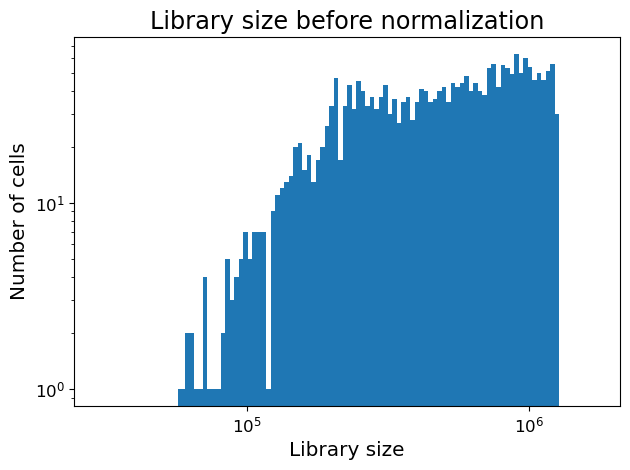

In [19]:
scprep.plot.plot_library_size(data, title='Library size before normalization')

In [20]:
data, metadata['library_size'] = scprep.normalize.library_size_normalize(data, return_library_size=True)

<Axes: title={'center': 'Library size after normalization'}, xlabel='Library size', ylabel='Number of cells'>

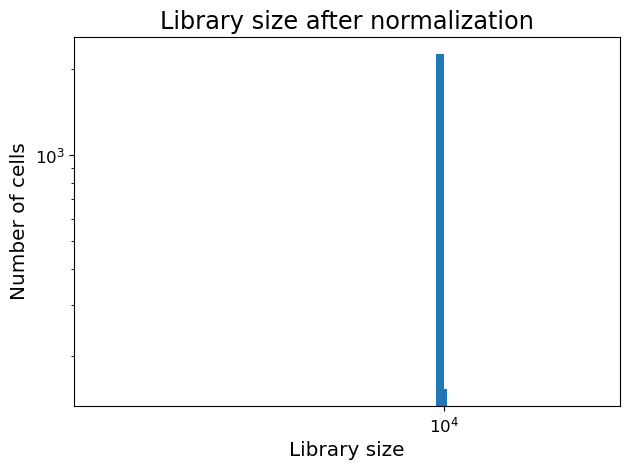

In [21]:
scprep.plot.plot_library_size(data, title='Library size after normalization')

## Gene count transformation

<Axes: title={'center': 'Histogram of Mean Expression'}, xlabel='Mean Expression', ylabel='Frequency'>

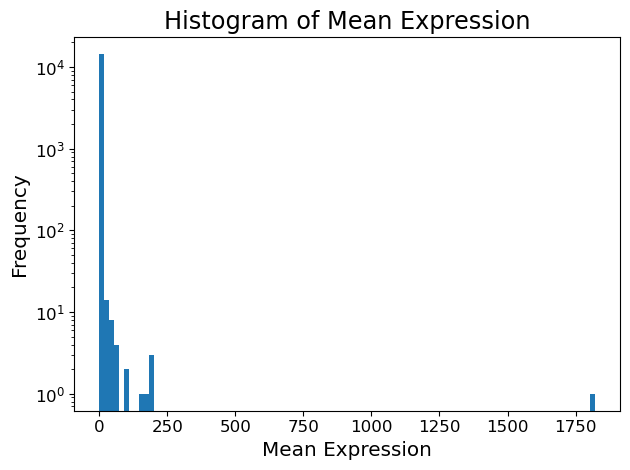

In [22]:
scprep.plot.histogram(data.mean(axis=0), log='y',
                      title='Histogram of Mean Expression',
                     xlabel= 'Mean Expression',
                     ylabel= 'Frequency')

In [23]:
data = scprep.transform.sqrt(data)

<Axes: title={'center': 'Histogram of Square Root of Mean Expression'}, xlabel='Square Root of Mean Expression', ylabel='Frequency'>

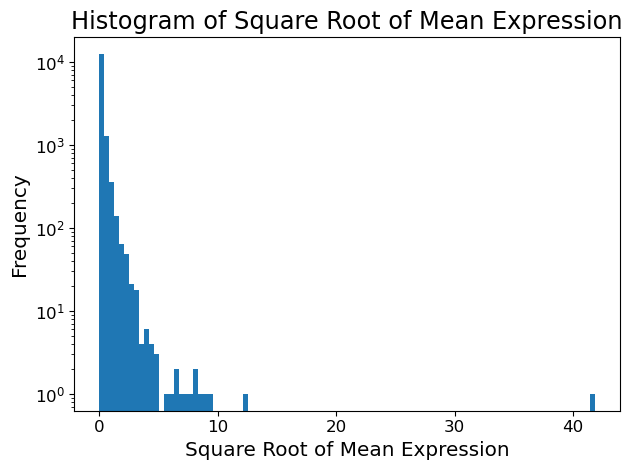

In [24]:
scprep.plot.histogram(data.mean(axis=0), log='y',
                      title= 'Histogram of Square Root of Mean Expression',
                      xlabel= 'Square Root of Mean Expression',
                      ylabel= 'Frequency')

In [25]:
data.to_pickle("scRNA-Data.pickle.gz") #file.pickle.gz
metadata.to_pickle("metadata.pickle.gz")  #file.pickle.gz

## PCA Analysis
I will try PCA and see how the plots look.

In [4]:
data = pd.read_pickle('scRNA-Data.pickle.gz')
metadata = pd.read_pickle('metadata.pickle.gz')

In [5]:
data_pca = scprep.reduce.pca(data, n_components=50, method='dense')

In [6]:
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
A22.D042044.3_9_M.1.1_*BCell-scRNA-Data,-22.988787,2.284903,-2.742361,-0.797050,1.309415,-5.985644,-2.229017,-11.983366,12.324745,10.408703,...,-3.127876,0.867395,1.026806,0.409777,0.766559,-3.634237,-1.453875,-2.880680,2.357174,-0.583599
C5.D042044.3_9_M.1.1_*BCell-scRNA-Data,-28.194481,-29.803997,5.925275,-17.815510,-12.882797,7.134192,-1.655318,1.648922,-7.912552,3.193577,...,1.064200,-0.562860,-0.582925,0.677150,-0.903865,0.334290,-1.357292,0.686804,-0.142289,-0.205490
D10.D042044.3_9_M.1.1_*BCell-scRNA-Data,-23.848281,-2.878069,-1.312919,-11.441581,0.861585,-6.010976,-2.115038,-3.687816,3.046004,1.873572,...,-0.198936,-0.205900,0.329374,2.031939,0.372721,0.568640,-2.922143,-5.527381,0.624381,2.921539
E13.D042044.3_9_M.1.1_*BCell-scRNA-Data,-20.809948,3.691955,7.509539,6.602445,18.700931,9.046406,23.590384,-3.855551,-4.739514,-0.330438,...,-0.578585,0.702935,-1.165494,-0.365525,1.817827,-2.184035,-0.024769,-3.117134,0.199739,0.910689
I9.D042044.3_9_M.1.1_*BCell-scRNA-Data,-22.576338,1.180363,7.281350,8.026822,13.502802,5.309350,25.032082,-2.099835,-3.787540,1.495800,...,0.091381,-0.839208,0.886439,-1.502819,0.940089,1.023881,1.187324,0.632756,-1.164034,2.195658


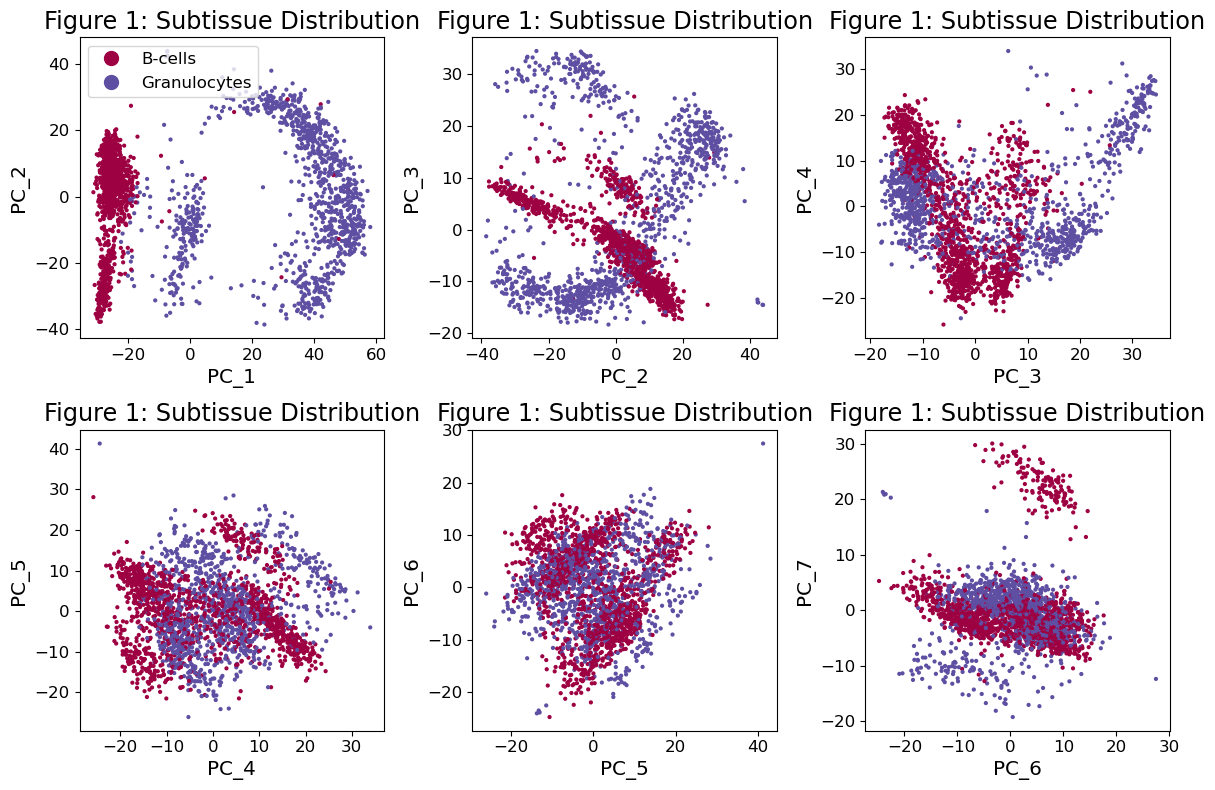

In [7]:
fig, axes = plt.subplots(2,3, figsize=(12,8))
# This makes it easier to iterate through the axes
axes = axes.flatten()

for i, ax in enumerate(axes):
    # only plot a legend on one axis
    legend = True if i == 0 else False
    # There are a lot of parameters here, you can find the full scatter documentation at
    # https://scprep.readthedocs.io/en/stable/reference.html#scprep.plot.scatter
    scprep.plot.scatter(data_pca.iloc[:,i], data_pca.iloc[:,i+1], c=metadata['subtissue'],
                        cmap='Spectral', ax=ax,title= 'Figure 1: Subtissue Distribution'.format(i+1, i+2),
                        xlabel="PC_" + str(i+1), ylabel="PC_" + str(i+2), legend=legend)
fig.tight_layout() 

PC_1 vs PC_2 show a good separation between B-cells and Granulocytes. Plotting some potential marker genes now.

<Axes: title={'center': 'Figure 3: Expression Distribution of Cd79a'}, xlabel='PC1', ylabel='PC2'>

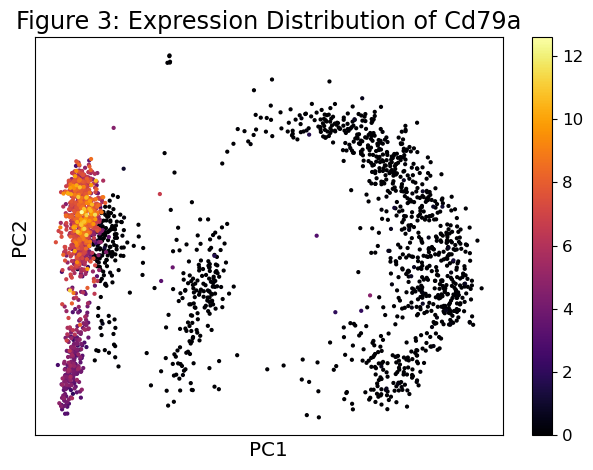

In [7]:
#Flt3 is expressed in developing B-cells and aligns somewhat with what we see on the graph
expression = scprep.select.select_cols(data, exact_word='Cd79a')
sort_index = expression.sort_values().index

scprep.plot.scatter2d(data_pca.loc[sort_index], c=expression.loc[sort_index], shuffle=False,
                      title='Figure 3: Expression Distribution of Cd79a', ticks=None, label_prefix='PC')

<Axes: title={'center': 'Figure 2: Expression Distribution of Psap'}, xlabel='PC1', ylabel='PC2'>

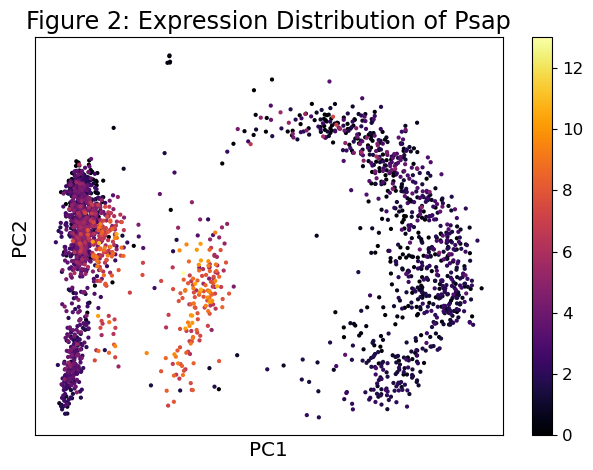

In [21]:
#Based on the t-test, PSAP was the most different gene among the populations
expression = scprep.select.select_cols(data, exact_word='Psap')
sort_index = expression.sort_values().index

scprep.plot.scatter2d(data_pca.loc[sort_index], c=expression.loc[sort_index], shuffle=False,
                      title='Figure 2: Expression Distribution of Psap', ticks=None, label_prefix='PC')

<Axes: title={'center': 'Ahnak'}, xlabel='PC1', ylabel='PC2'>

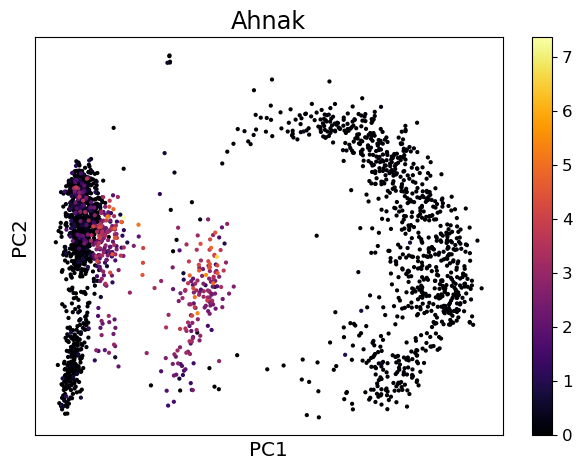

In [8]:
#Ahnak
expression = scprep.select.select_cols(data, exact_word='Ahnak')
sort_index = expression.sort_values().index

scprep.plot.scatter2d(data_pca.loc[sort_index], c=expression.loc[sort_index], shuffle=False,
                      title='Ahnak', ticks=None, label_prefix='PC')

<Axes: title={'center': 'Mpeg1'}, xlabel='PC1', ylabel='PC2'>

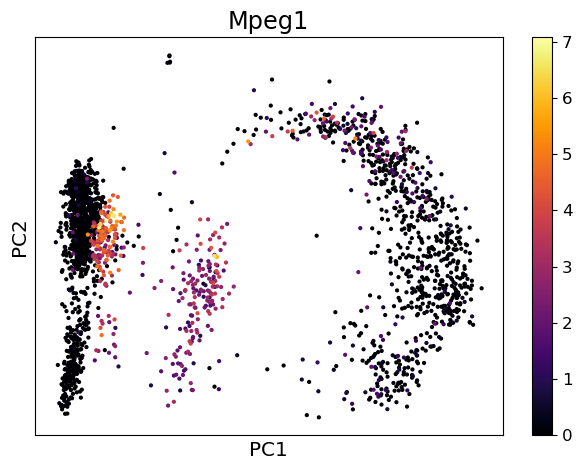

In [9]:
#Mpeg1
expression = scprep.select.select_cols(data, exact_word='Mpeg1')
sort_index = expression.sort_values().index

scprep.plot.scatter2d(data_pca.loc[sort_index], c=expression.loc[sort_index], shuffle=False,
                      title='Mpeg1', ticks=None, label_prefix='PC')

<Axes: title={'center': 'Pld4'}, xlabel='PC1', ylabel='PC2'>

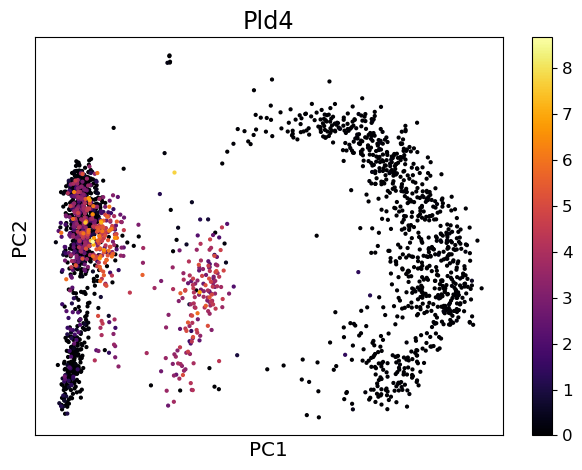

In [11]:
#Pld4
expression = scprep.select.select_cols(data, exact_word='Pld4')
sort_index = expression.sort_values().index

scprep.plot.scatter2d(data_pca.loc[sort_index], c=expression.loc[sort_index], shuffle=False,
                      title='Pld4', ticks=None, label_prefix='PC')

I tried some genes that would be found in granulocytes, but could not get detection in the graph. This could be due to granulocytes being progenitor stem cells and not matured cells.

## UMAP analysis
PCA looked quite good, taking a look at UMAP analysis results

In [57]:
data_umap = umap.UMAP().fit_transform(data_pca.iloc[:,:50])

In [58]:
data_umap = pd.DataFrame(data_umap, index = data.index)

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

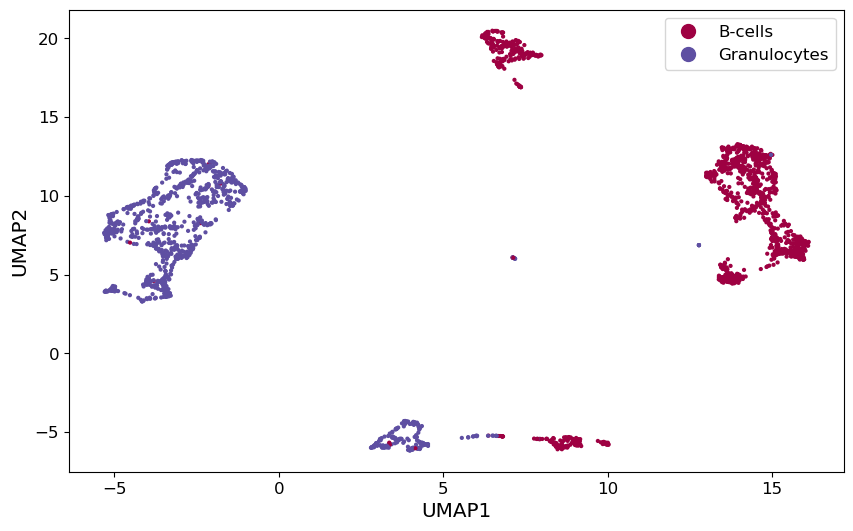

In [59]:
fig, ax = plt.subplots(figsize=(10,6)) ## feel free to adjust size

scprep.plot.scatter2d( 
  data_umap, cmap='Spectral',
  c=metadata['subtissue'], ax=ax,
  label_prefix="UMAP"
)

UMAP also divides the cells into groups rather well.

## Clustering the cells
I'll use all three methods that we tried in HW 4. Will choose 3 clusters since that appears to work on the PC_1 vs PC_2 graph.

In [14]:
%%bash
pip install scprep umap-learn phenograph tasklogger graphtools

  Using cached PhenoGraph-1.5.7-py3-none-any.whl (159 kB)
  Using cached tasklogger-1.2.0-py3-none-any.whl (14 kB)
  Using cached graphtools-1.5.3-py3-none-any.whl (45 kB)
  Using cached leidenalg-0.10.2-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.0 MB)
  Using cached Deprecated-1.2.15-py2.py3-none-any.whl (9.9 kB)
  Using cached PyGSP-0.5.1-py2.py3-none-any.whl (1.8 MB)
  Using cached igraph-0.11.8-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached wrapt-1.17.0-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (83 kB)
  Using cached texttable-1.7.0-py2.py3-none-any.whl (10 kB)


In [15]:
import sklearn
import sklearn.cluster
import sklearn.manifold
import graphtools as gt
import phenograph
import matplotlib.pyplot as plt
import tasklogger

In [16]:
#Phenograph clustering
with tasklogger.log_task("phenograph"):
    phenograph_clusters, _, _ = phenograph.cluster(data_pca)

Calculating phenograph...
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.05478835105895996 seconds
Jaccard graph constructed in 0.482558012008667 seconds
Wrote graph to binary file in 0.054117441177368164 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.870962
Louvain completed 21 runs in 0.6169838905334473 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 1.3615214824676514 seconds
Calculated phenograph in 1.36 seconds.


In [17]:
#Kmeans clustering
with tasklogger.log_task("KMeans"):
    kmeans_clusters = sklearn.cluster.KMeans(n_clusters = 4, n_init=10).fit_predict(data_pca)

Calculating KMeans...
Calculated KMeans in 1.14 seconds.


In [18]:
#Spectral clustering
G = gt.Graph(data_pca)
G_igraph = G.to_igraph()
with tasklogger.log_task("Spectral clustering"):
    spec_op = sklearn.cluster.SpectralClustering(n_clusters = 3, affinity='precomputed')
    spectral_clusters = spec_op.fit_predict(G.K)

Calculating Spectral clustering...
Calculated Spectral clustering in 3.03 seconds.


In [19]:
clusterings = {'Phenograph':phenograph_clusters,
               'KMeans':kmeans_clusters,
               'Spectral':spectral_clusters}

for alg in clusterings:
    cl_nu = scprep.utils.sort_clusters_by_values(clusterings[alg], -data_pca.iloc[:,0])
    clusterings[alg] = cl_nu

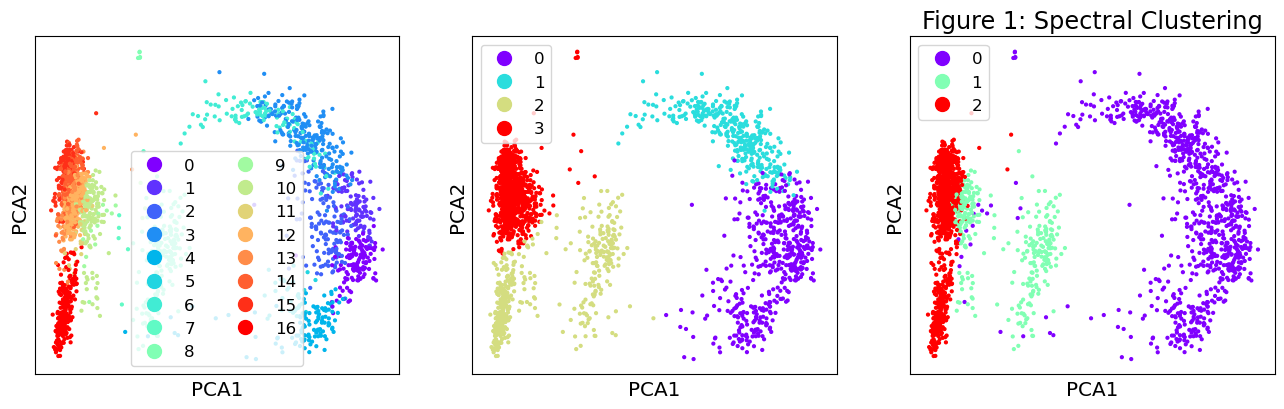

In [20]:
fig, axes = plt.subplots(1,3, figsize=(16,16), subplot_kw={'aspect':'equal'})
count = 1
for ax, algorithm in zip(axes.flatten(), clusterings):
    if count == 3:
        title_string ='Figure 1: {} Clustering'.format(algorithm)
    else:
        title_string = ''
    scprep.plot.scatter2d(data_pca, c=clusterings[algorithm], cmap=plt.cm.rainbow,
                        title=title_string,
                        ticks=False, label_prefix="PCA", legend=True, discrete=True,
                        ax=ax)
    count += 1

The spectral clustering method with 3 clusters appears to distinguish the B-Cells from the rest of the cells the best in cluster 2. Finding the most different genes in PCA1 vs PCA2 using the spectral clusters.

In [36]:
print(len(clusterings['Spectral']))

2399


In [37]:
data_sparse = scprep.utils.SparseDataFrame(data)
curr_cluster = 2
ttest_results = scprep.stats.differential_expression(data_sparse[spectral_clusters == curr_cluster],
                                                   data_sparse[spectral_clusters != curr_cluster],
                                                   measure='ttest')

In [38]:
top_genes = ttest_results['ttest'].abs().sort_values(ascending=False)[:50]
display(top_genes.head(n=20))

Psap             49.000182
Cd79a            46.486169
Ahnak            43.857500
Mpeg1            41.423640
Pld4             40.690820
Cd24a            40.193451
Ctsb             38.366322
Plac8            37.535480
Vpreb3           37.455133
Cd19             37.312071
Cd79b            37.286022
S100a9           36.532124
S100a8           35.930653
Pou2af1          35.920078
Ctss             35.534521
Lgals1           34.278026
Cd68             34.030526
Chchd10          33.847793
1100001G20Rik    33.489133
Npc2             32.974178
Name: ttest, dtype: float64